In [3]:
#Import dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
#Read data files:
data_2015=pd.read_csv("Resources/2015.csv")
data_2016=pd.read_csv("Resources/2016.csv")
data_2017=pd.read_csv("Resources/2017.csv")
gdf = gpd.read_file("Resources/countries")

In [91]:
#Make data frames of relevant columns:
df_2016=data_2016[["Country","Happiness Score"]]
df_2015=data_2015[["Country","Happiness Score"]]
df_2017=data_2017[["Country","Happiness.Score"]]

#Merge data frames:
df=pd.merge(df_2015, df_2016, on="Country")
df=pd.merge(df, df_2017, on="Country")

#Rename columns:
df=df.rename(columns={'Happiness Score_x':'2015 Happiness','Happiness Score_y':'2016 Happiness','Happiness.Score':'2017 Happiness'})

#Make a mean column:
df["Average Happiness"]=df.mean(axis=1)

#Replace country names to match other dataset:
df=df.replace("United States", "United States of America")
df=df.replace("Congo (Brazzaville)",'Republic of the Congo')
df=df.replace('Congo (Kinshasa)','Democratic Republic of the Congo')
df=df.replace('Czech Republic','Czechia')
df=df.replace('Serbia','Republic of Serbia')
df=df.replace('Tanzania','United Republic of Tanzania')

#Preview:
df.head()

,Country,2015 Happiness,2016 Happiness,2017 Happiness,Average Happiness
0,Switzerland,7.587,7.509,7.494,7.530000
1,Iceland,7.561,7.501,7.504,7.522000
2,Denmark,7.527,7.526,7.522,7.525000
3,Norway,7.522,7.498,7.537,7.519000
4,Canada,7.427,7.404,7.316,7.382333


In [27]:
#Make dataframe of relevant columns:
gdf_short=gdf[["SOVEREIGNT", "geometry"]]

#Preview:
gdf_short.head()

array(['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina',
       'United Kingdom', 'Cyprus', 'India', 'China', 'Israel', 'Lebanon',
       'Ethiopia', 'South Sudan', 'Somalia', 'Kenya', 'Pakistan',
       'Malawi', 'United Republic of Tanzania', 'Syria', 'Somaliland',
       'France', 'Suriname', 'Guyana', 'South Korea', 'North Korea',
       'Morocco', 'Western Sahara', 'Costa Rica', 'Nicaragua',
       'Republic of the Congo', 'Democratic Republic of the Congo',
       'Bhutan', 'Ukraine', 'Belarus', 'Namibia', 'South Africa',
       'Netherlands', 'Oman', 'Uzbekistan', 'Kazakhstan', 'Tajikistan',
       'Lithuania', 'Brazil', 'Uruguay', 'Mongolia', 'Russia', 'Czechia',
       'Germany', 'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland',
       'Vietnam', 'Cambodia', 'Luxembourg', 'United Arab Emirates',
       'Belgium', 'Georgia', 'Macedonia', 'Albania', 'Azerbaijan',
       'Kosovo', 'Turkey', 'Spain', 'Laos', 'Kyrgyzstan', 'Armenia',
       'Denmark', 'Libya', 'Tu

In [57]:
#Merge data frame with shape info:
merged = gdf_short.merge(df, left_on='SOVEREIGNT', right_on='Country', how="outer")

#Preview:
merged.head()

,SOVEREIGNT,geometry,Country,2015 Happiness,2016 Happiness,2017 Happiness,Average Happiness
0,Indonesia,(POLYGON ((117.7036079039552 4.163414542001791...,Indonesia,5.399,5.314,5.262,5.325000
1,Malaysia,(POLYGON ((117.7036079039552 4.163414542001791...,Malaysia,5.770,6.005,6.084,5.953000
2,Chile,(POLYGON ((-69.51008875199994 -17.506588197999...,Chile,6.670,6.705,6.652,6.675667
3,Bolivia,POLYGON ((-69.51008875199994 -17.5065881979999...,Bolivia,5.890,5.822,5.823,5.845000
4,Peru,(POLYGON ((-69.51008875199994 -17.506588197999...,Peru,5.824,5.743,5.715,5.760667


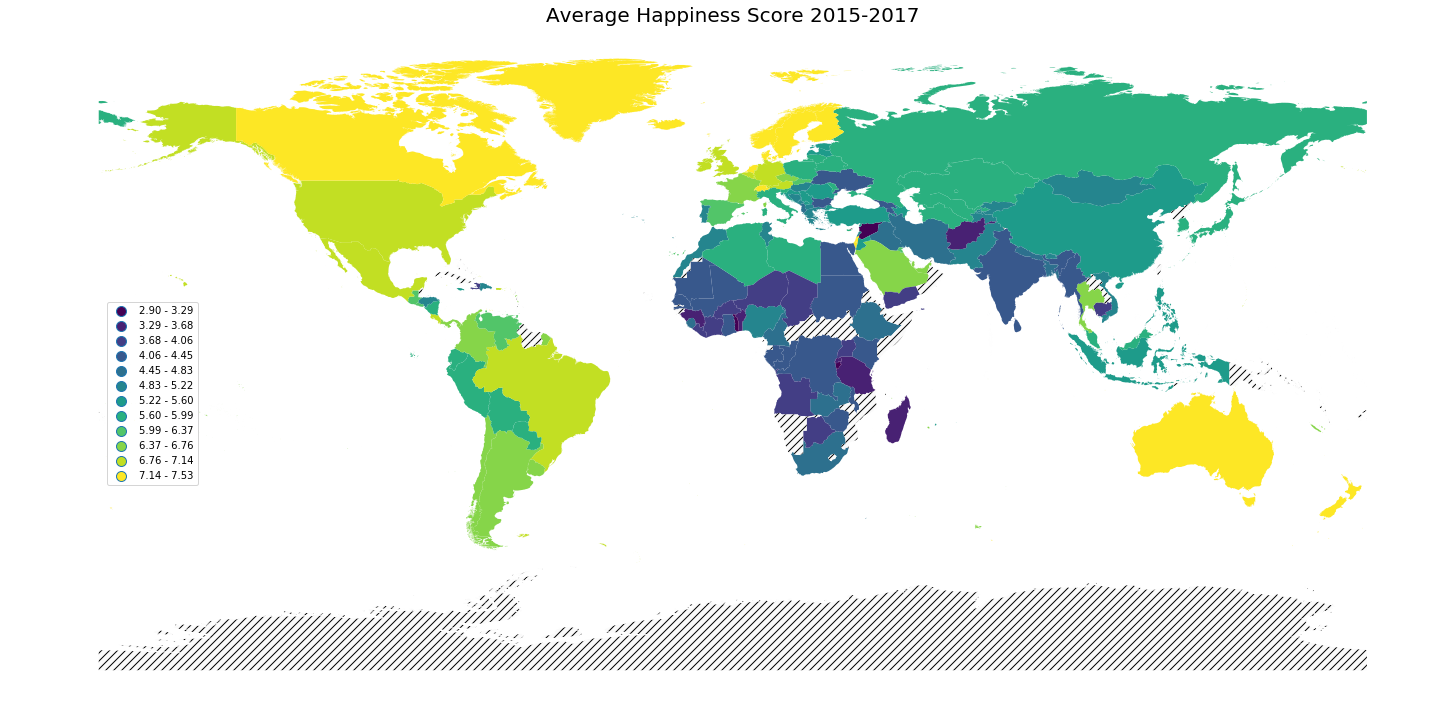

In [92]:
#Set title:
title="Average Happiness Score 2015-2017"

#Set figure size, number of colors and color scheme:
figsize = (25, 16)
colors=12
cmap="viridis"

#Create color map:
ax=merged.dropna().plot(column="Average Happiness", cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True,  )

#Set N/A color: 
merged[merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')

#Remove axes:
ax.set_axis_off()

#Set Title:
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')

#Move legend:
ax.get_legend().set_bbox_to_anchor((.12, .6))

#Save figure:
plt.savefig("Outputs/happiness_heatmap")